In [ ]:
#Import nessacery libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# 3. Load the Pima Indians Diabetes dataset into your Jupyter Notebook environment.
#---------------------------------------------------------------------------------
# loading dataset
diabetes_data = pd.read_csv('pima-indians-diabetes.csv')

In [ ]:
# 4. Review the dataset structure and characteristics.
#-----------------------------------------------------
diabetes_data.head()       # display first few raws of dataset
#diabetes_data.info()      # basic information about dataset
#diabetes_data.describe()  # display summery statistics of dataset

In [4]:
# 5. Perform data preprocessing by splitting the dataset into training and testing sets.
#--------------------------------------------------------------------------------------
X = diabetes_data.drop("Outcome", axis=1)  # features(independent variables)
y = diabetes_data["Outcome"]               # target variable (dependent variable) 

# Splitting dataset into training and testing sets
# test_size - the proportion of the dataset to include in the test split
# random_state - ensures reproducibility of the split
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Displaying the shape of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

In [6]:
# 6. Standardize the features using the StandardScaler from scikit-learn.
#------------------------------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Display the shape of the scaled training and testing sets
print("\nShape of scaled training set (X_train_scaled): ", X_train_scaled.shape)
print("Shape of scaled testing set (X_test_scaled): ", X_test_scaled.shape)

In [8]:
# 7. Build a neural network model using Keras.
#---------------------------------------------
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=1, activation='sigmoid'))


# 8. Compile the neural network model by specifying the optimizer and loss function.
# 9. Choose appropriate metrics for model evaluation.
# ----------------------------------------------------------------------------------
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# 10. Train the compiled model using the training dataset.
# --------------------------------------------------------
# Train the model on the training data
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1)


# 11. Monitor training progress, including loss and accuracy metrics.
# -------------------------------------------------------------------
# Create a callback to monitor training progress
history_callback = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1)
# Retrieve training history
training_history = history_callback.history


# 12. Evaluate the trained model's performance on the test set
# ------------------------------------------------------------
# Evaluate the model on the testing data
eval_result = model.evaluate(X_test_scaled, y_test)
print("\nTest Loss:", eval_result[0])
print("Test Accuracy:", eval_result[1])

Epoch 1/10
18/18 [==============================] - 1s 19ms/step - loss: 0.6906 - accuracy: 0.5199 - val_loss: 0.7026 - val_accuracy: 0.6452
Epoch 2/10
18/18 [==============================] - 0s 6ms/step - loss: 0.6388 - accuracy: 0.6812 - val_loss: 0.6640 - val_accuracy: 0.6613
Epoch 3/10
18/18 [==============================] - 0s 6ms/step - loss: 0.6019 - accuracy: 0.7337 - val_loss: 0.6299 - val_accuracy: 0.7097
Epoch 4/10
18/18 [==============================] - 0s 6ms/step - loss: 0.5717 - accuracy: 0.7482 - val_loss: 0.6028 - val_accuracy: 0.7258
Epoch 5/10
18/18 [==============================] - 0s 6ms/step - loss: 0.5483 - accuracy: 0.7681 - val_loss: 0.5844 - val_accuracy: 0.7097
Epoch 6/10
18/18 [==============================] - 0s 7ms/step - loss: 0.5308 - accuracy: 0.7663 - val_loss: 0.5662 - val_accuracy: 0.6935
Epoch 7/10
18/18 [==============================] - 0s 6ms/step - loss: 0.5151 - accuracy: 0.7699 - val_loss: 0.5528 - val_accuracy: 0.7258
Epoch 8/10
18/18 [=

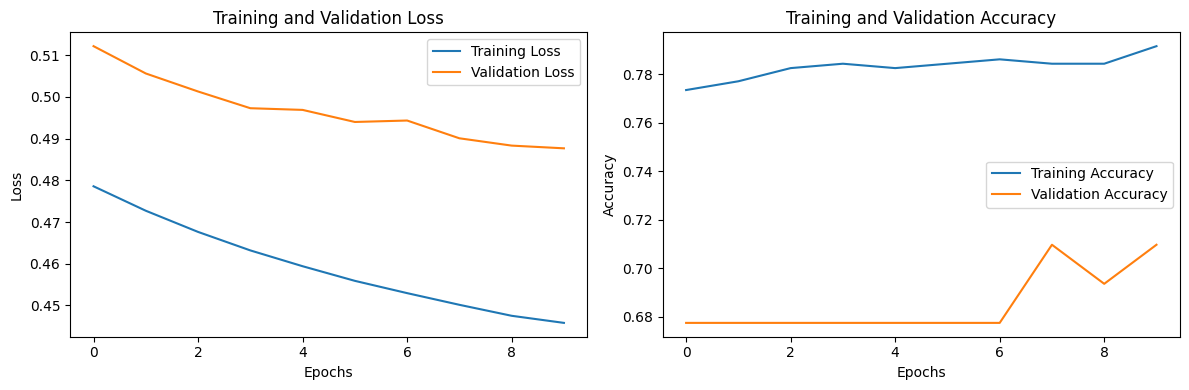

In [9]:
# 11-PartB. Monitor training progress, including loss and accuracy metrics.
# Plot training loss and accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(training_history['loss'], label='Training Loss')
plt.plot(training_history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(training_history['accuracy'], label='Training Accuracy')
plt.plot(training_history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
# 13. Make predictions for a given set of input features using the trained model.
# -------------------------------------------------------------------------------
new_input_features_scaled = scaler.transform(X_train)  # Scale the new input features

# Make predictions
predictions = model.predict(new_input_features_scaled)

# If you want binary predictions (0 or 1)
binary_predictions = (predictions > 0.5).astype(int)

# Display the predictions
print("Raw Predictions:", predictions)
#  (0: No Diabetes, 1: Diabetes)
print("Binary Predictions:", binary_predictions)

20/20 [==============================] - 0s 3ms/step
Raw Predictions: [[0.00234496]
 [0.5050993 ]
 [0.32061946]
 [0.62046194]
 [0.76508653]
 [0.1281586 ]
 [0.54767865]
 [0.5807439 ]
 [0.13548836]
 [0.01296515]
 [0.10232981]
 [0.7936143 ]
 [0.04950324]
 [0.31721738]
 [0.80361307]
 [0.55082417]
 [0.62439215]
 [0.22342722]
 [0.39586103]
 [0.640762  ]
 [0.6825948 ]
 [0.11321341]
 [0.2399399 ]
 [0.30782104]
 [0.29523554]
 [0.41505498]
 [0.32786474]
 [0.45786762]
 [0.33576936]
 [0.6488718 ]
 [0.62066215]
 [0.07851299]
 [0.04811574]
 [0.10453652]
 [0.80683327]
 [0.5957835 ]
 [0.05564144]
 [0.10347693]
 [0.84407604]
 [0.24803826]
 [0.08687757]
 [0.05949412]
 [0.00575493]
 [0.04726652]
 [0.2280513 ]
 [0.69383323]
 [0.16581148]
 [0.07074504]
 [0.30696347]
 [0.17411089]
 [0.636115  ]
 [0.12081084]
 [0.09729671]
 [0.21216235]
 [0.88140684]
 [0.65888554]
 [0.2562728 ]
 [0.235815  ]
 [0.14350358]
 [0.15351073]
 [0.6692373 ]
 [0.06147035]
 [0.47114417]
 [0.40098864]
 [0.43674567]
 [0.76763767]
 [0.56